<a href="https://colab.research.google.com/github/jhonesaly/ml-tools/blob/main/yolo_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PREPARAÇÃO

!nvidia-smi
!pip install ultralytics

Fri Aug  8 19:59:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# UNZIP DATASET

## O dataset já pronto já deve ser salvo como um zip. Ferramentas de mesclagem de datasets ficarão em dataset-tools.py

!unzip -q /content/data.zip -d /content/custom_data

In [6]:
# TREINAMENTO

!yolo detect train data=/content/custom_data/data.yaml model=yolo11s.pt epochs=40 imgsz=640

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

In [17]:
# VALIDAÇÃO

import os
import glob

# Find the latest training run directory
list_of_runs = glob.glob('runs/detect/train*')
latest_run = max(list_of_runs, key=os.path.getctime)

# Construct the path to the best model weights
latest_model_path = os.path.join(latest_run, 'weights', 'best.pt')

# Construct the prediction command with the latest model path and confidence threshold
predict_command = f"yolo detect predict model={latest_model_path} source=/content/custom_data/valid/images save=True conf=0.8"

# Execute the command
print(f"Executing command: {predict_command}")
os.system(predict_command)

Executing command: yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/custom_data/valid/images save=True conf=0.8


0

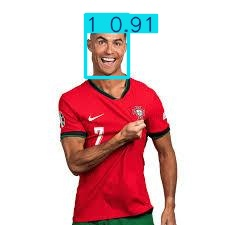

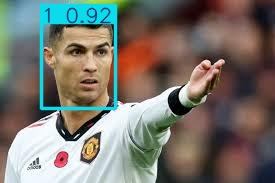

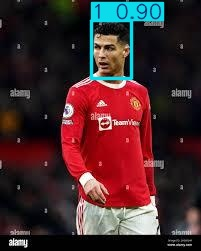

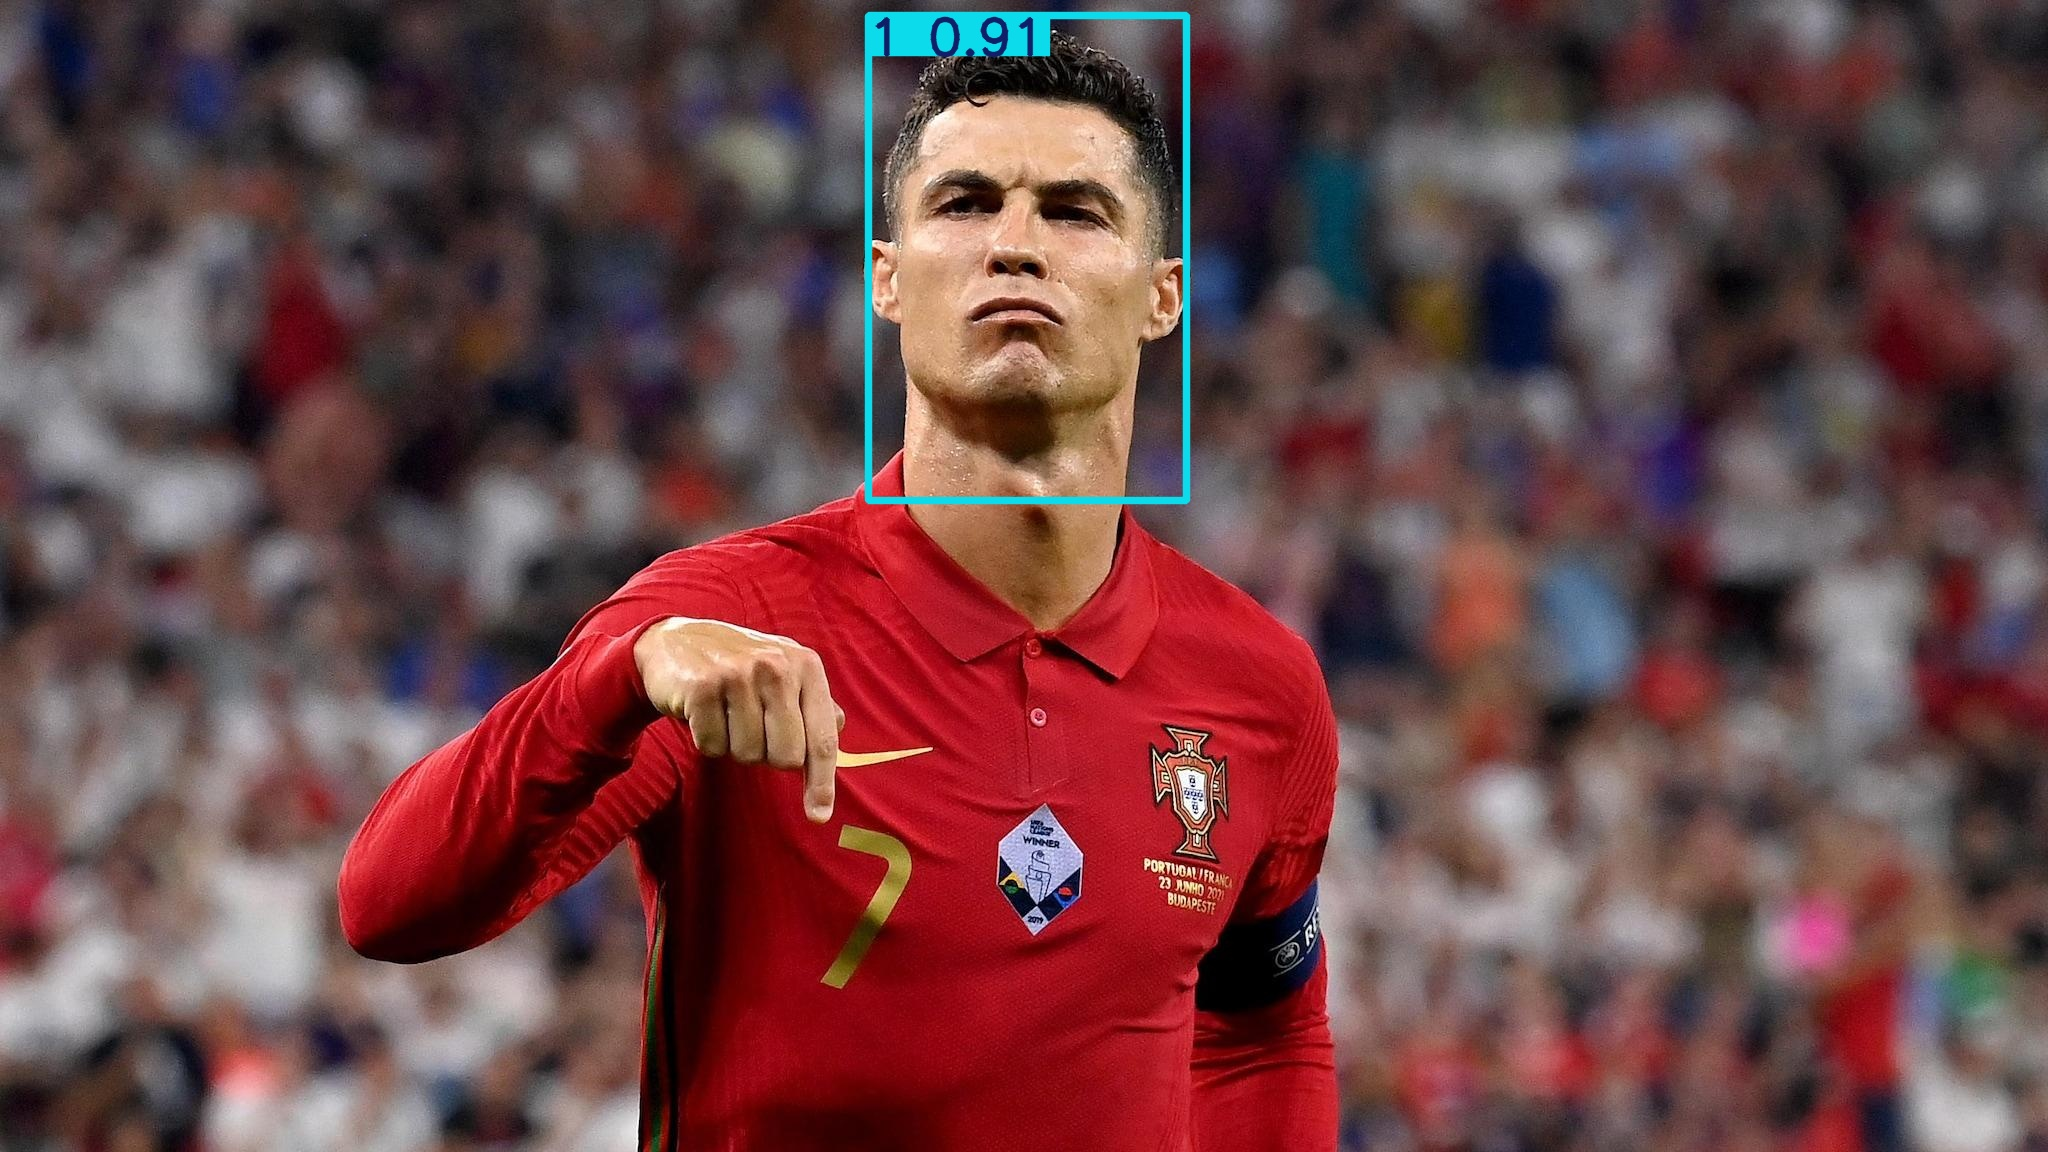

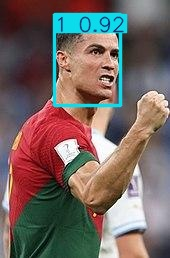

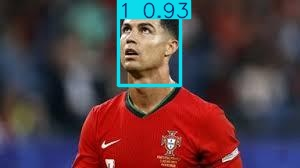

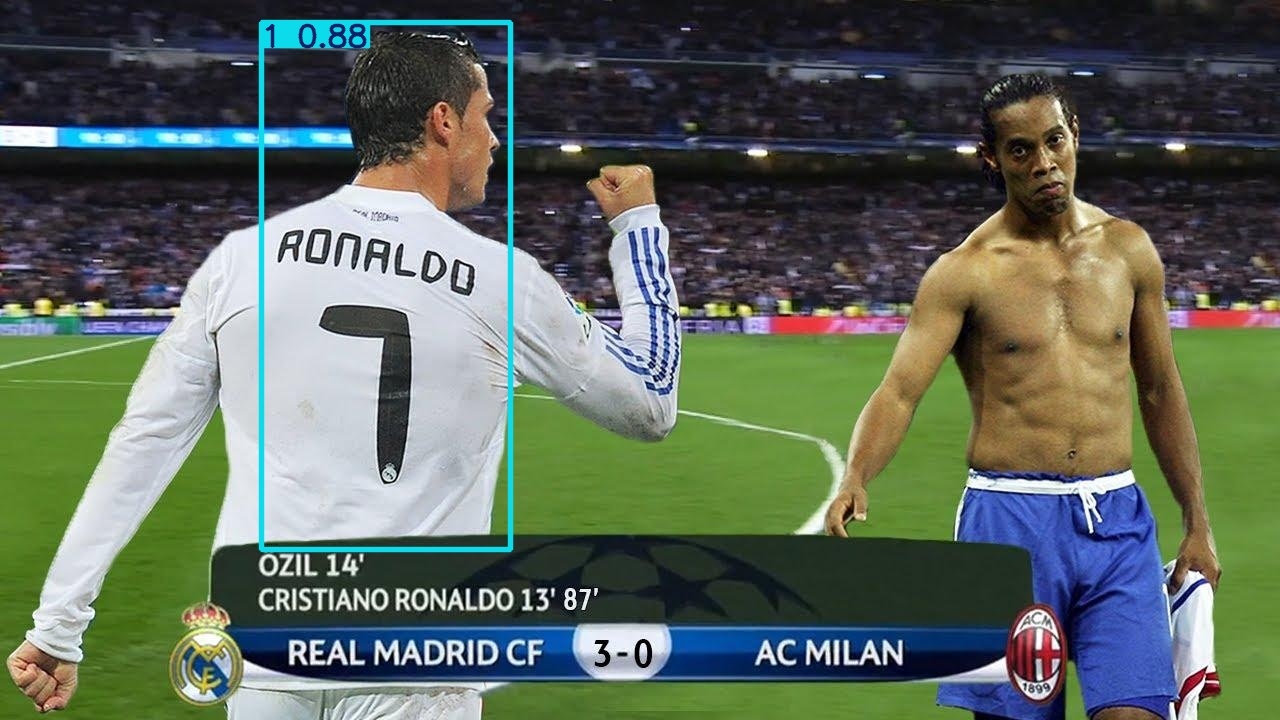

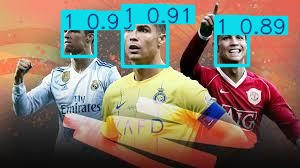

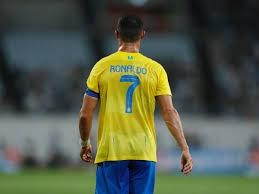

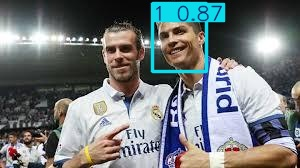

In [18]:
# RESULTADO DA VALIDAÇÃO

import glob
import os
from IPython.display import Image, display

# Find the latest prediction run directory
list_of_predicts = glob.glob('/content/runs/detect/predict*')
latest_predict_run = max(list_of_predicts, key=os.path.getctime)

# Display images from the latest prediction run
for image_path in glob.glob(f'{latest_predict_run}/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [25]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train3/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train3 /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/args.yaml (deflated 53%)
  adding: train/weights/ (stored 0%)
/content


In [24]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>